In [1]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/ECS 235 CICIDS Data.csv")

In [2]:
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1.040160e+13,443,1.920170e+11,54865,6,07-07-2017 3.30,3,2,0,12,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1.040160e+12,80,1.920170e+11,55054,6,07-07-2017 3.30,109,1,1,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,1.040160e+12,80,1.920170e+11,55055,6,07-07-2017 3.30,52,1,1,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,1.040170e+12,443,1.920170e+12,46236,6,07-07-2017 3.30,34,1,1,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,1.040190e+13,443,1.920170e+11,54863,6,07-07-2017 3.30,3,2,0,12,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
import xgboost as xgb
import numpy as np

In [4]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

In [5]:
df.drop([' Bwd PSH Flags'], axis=1, inplace=True)
df.drop([' Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop([' Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)


In [6]:
df.drop([' Timestamp'], axis=1, inplace=True)


In [7]:
'''df.drop([' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min',' Source Port', ' Protocol',' Destination Port'], axis=1, inplace=True)'''


"df.drop([' Flow Duration', ' Total Fwd Packets',\n       ' Total Backward Packets', 'Total Length of Fwd Packets',\n       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',\n       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',\n       ' Fwd Packet Length Std', 'Bwd Packet Length Max',\n       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',\n       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',\n       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',\n       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',\n       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',\n       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',\n       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',\n       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',\n       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',\n       'FIN Flag Count', ' SYN Flag Count', ' RS

In [8]:
df.columns

Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' 

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df[' Label'] = labelencoder.fit_transform(df[' Label'])

In [10]:
df.tail()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225740,7.202109e+10,80,1.920170e+12,61374,6,61,1,1,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225741,7.202109e+10,80,1.920170e+12,61378,6,72,1,1,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225742,7.202109e+10,80,1.920170e+12,61375,6,75,1,1,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225743,8.041020e+11,80,1.920170e+12,61323,6,48,2,0,12,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225744,8.043072e+09,80,1.920170e+12,61326,6,68,1,1,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
ar=df.copy()
ar.drop([' Label'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(ar,df.iloc[:,-1:],test_size=0.5, random_state=42, shuffle=True)

In [12]:
ar

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.040160e+13,443,1.920170e+11,54865,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,1.040160e+12,80,1.920170e+11,55054,6,109,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,1.040160e+12,80,1.920170e+11,55055,6,52,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,1.040170e+12,443,1.920170e+12,46236,6,34,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,1.040190e+13,443,1.920170e+11,54863,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,7.202109e+10,80,1.920170e+12,61374,6,61,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,7.202109e+10,80,1.920170e+12,61378,6,72,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,7.202109e+10,80,1.920170e+12,61375,6,75,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,8.041020e+11,80,1.920170e+12,61323,6,48,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [13]:
df.iloc[:,-1:]

,Label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [14]:
X_train.shape

(112872, 74)

In [15]:
y_test

,Label
127940,1
195330,0
202016,0
18959,1
120928,0
...,...
80478,1
153225,1
213158,0
172722,1


In [16]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.metrics import classification_report

In [18]:
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = metrics.accuracy_score(Y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48974
           1       1.00      1.00      1.00     63899

    accuracy                           1.00    112873
   macro avg       1.00      1.00      1.00    112873
weighted avg       1.00      1.00      1.00    112873



In [19]:
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = metrics.accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48974
           1       1.00      1.00      1.00     63899

    accuracy                           1.00    112873
   macro avg       1.00      1.00      1.00    112873
weighted avg       1.00      1.00      1.00    112873



[[48974     0]
 [    1 63898]]


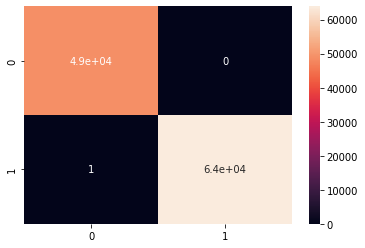

In [20]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [21]:
df[' Label'].value_counts()


1    128027
0     97718
Name:  Label, dtype: int64

In [22]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48974
           1       1.00      1.00      1.00     63899

    accuracy                           1.00    112873
   macro avg       1.00      1.00      1.00    112873
weighted avg       1.00      1.00      1.00    112873



In [92]:
df=pd.read_csv("/content/drive/MyDrive/ECS 235 A/permu.csv")

In [93]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

In [94]:
df.drop([' Bwd PSH Flags'], axis=1, inplace=True)
df.drop([' Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop([' Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)


In [95]:
df.drop([' Timestamp'], axis=1, inplace=True)


In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df[' Label'] = labelencoder.fit_transform(df[' Label'])

In [97]:
ar=df.copy()
ar.drop([' Label'], axis=1, inplace=True)
X_test=ar

In [98]:
y_test=df.iloc[:,-1:]
y_test

,Label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [99]:
y_pred=model.predict(X_test)

In [100]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97718
           1       1.00      1.00      1.00    128027

    accuracy                           1.00    225745
   macro avg       1.00      1.00      1.00    225745
weighted avg       1.00      1.00      1.00    225745



[[ 97711      7]
 [     4 128023]]


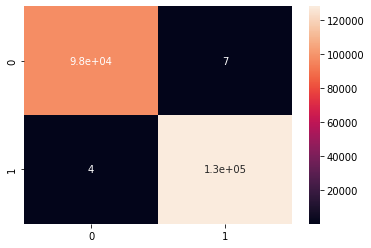

In [101]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [33]:
df=pd.read_csv("/content/drive/MyDrive/ECS 235 A/BlackMarker.csv")

In [34]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

In [35]:
df.drop([' Bwd PSH Flags'], axis=1, inplace=True)
df.drop([' Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop([' Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)


In [36]:
df.drop([' Timestamp'], axis=1, inplace=True)


In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df[' Label'] = labelencoder.fit_transform(df[' Label'])

In [38]:
ar=df.copy()
ar.drop([' Label'], axis=1, inplace=True)
X_test=ar

In [39]:
y_test=df.iloc[:,-1:]
y_test

,Label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [40]:
y_pred=clf.predict(X_test)

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      1.00      0.60     97718
           1       0.00      0.00      0.00    128027

    accuracy                           0.43    225745
   macro avg       0.22      0.50      0.30    225745
weighted avg       0.19      0.43      0.26    225745



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 97718      0]
 [128027      0]]


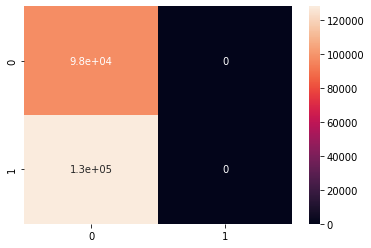

In [42]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [43]:
df=pd.read_csv("/content/drive/MyDrive/ECS 235 A/random_Algo.csv")

In [44]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

In [45]:
df.drop([' Bwd PSH Flags'], axis=1, inplace=True)
df.drop([' Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop([' Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)


In [46]:
#df.drop([' Timestamp'], axis=1, inplace=True)


In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df[' Label'] = labelencoder.fit_transform(df[' Label'])

In [48]:
ar=df.copy()
ar.drop([' Label'], axis=1, inplace=True)
X_test=ar

In [49]:
y_test=df.iloc[:,-1:]
y_test

,Label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [50]:
X_test.drop(columns = X_test.columns[0], axis = 1, inplace= True)

In [51]:
X_test

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1960800320225,443,162019401900194,54865,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,2490350750186,80,3302501110156,55054,6,109,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,1309801730197,80,23402230300105,55055,6,52,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,90530590173,443,7701702500209,46236,6,34,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,11307201640218,443,207011102470130,54863,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,630155087086,80,1180147082071,61374,6,61,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,12908001150231,80,2050104075059,61378,6,72,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,22101690100115,80,830181072064,61375,6,75,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,11808502270246,80,20601700600133,61323,6,48,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [52]:
y_pred=clf.predict(X_test)

In [53]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      1.00      0.60     97718
           1       0.66      0.00      0.00    128027

    accuracy                           0.43    225745
   macro avg       0.55      0.50      0.30    225745
weighted avg       0.56      0.43      0.26    225745



[[ 97570    148]
 [127743    284]]


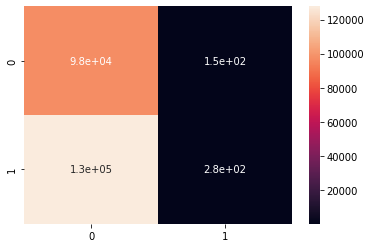

In [54]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [55]:
df=pd.read_csv("/content/drive/MyDrive/ECS 235 A/PrefixPreserved.csv")

In [56]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

In [57]:
df.drop([' Bwd PSH Flags'], axis=1, inplace=True)
df.drop([' Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop([' Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)


In [58]:
df.drop([' Timestamp'], axis=1, inplace=True)


In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df[' Label'] = labelencoder.fit_transform(df[' Label'])

In [60]:
ar=df.copy()
ar.drop([' Label'], axis=1, inplace=True)
X_test=ar

In [61]:
y_test=df.iloc[:,-1:]
y_test

,Label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [62]:
X_test

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.040310e+12,443,1.920170e+14,54865,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,1.040310e+12,80,1.920170e+14,55054,6,109,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,1.040310e+12,80,1.920170e+14,55055,6,52,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,1.040300e+12,443,1.920170e+14,46236,6,34,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,1.040280e+11,443,1.920170e+14,54863,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,7.202340e+13,80,1.920170e+14,61374,6,61,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,7.202340e+13,80,1.920170e+14,61378,6,72,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,7.202340e+13,80,1.920170e+14,61375,6,75,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,8.042046e+10,80,1.920170e+14,61323,6,48,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [63]:
y_pred=clf.predict(X_test)

In [64]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      1.00      0.60     97718
           1       1.00      0.00      0.00    128027

    accuracy                           0.43    225745
   macro avg       0.72      0.50      0.30    225745
weighted avg       0.75      0.43      0.26    225745



[[ 97718      0]
 [128025      2]]


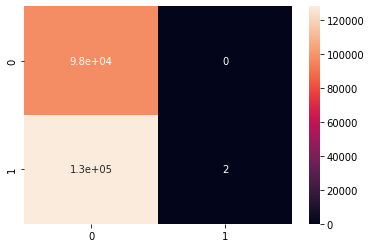

In [65]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [66]:
df=pd.read_csv("/content/drive/MyDrive/ECS 235 A/RevTrunc-12.csv")

In [67]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

In [68]:
df.drop([' Bwd PSH Flags'], axis=1, inplace=True)
df.drop([' Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop([' Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)


In [69]:
df.drop([' Timestamp'], axis=1, inplace=True)


In [70]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df[' Label'] = labelencoder.fit_transform(df[' Label'])

In [71]:
ar=df.copy()
ar.drop([' Label'], axis=1, inplace=True)
X_test=ar

In [72]:
y_test=df.iloc[:,-1:]
y_test

,Label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [73]:
X_test

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1602070165,443,1602070165,54865,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,160280216,80,160280216,55054,6,109,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,160280216,80,160280216,55055,6,52,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,170241025,443,170241025,46236,6,34,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,1901960102,443,1901960102,54863,6,3,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,21091029,80,21091029,61374,6,61,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,21091029,80,21091029,61378,6,72,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,21091029,80,21091029,61375,6,75,1,1,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,4102220187,80,4102220187,61323,6,48,2,0,12,0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [74]:
y_pred=clf.predict(X_test)

In [75]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      1.00      0.60     97718
           1       0.00      0.00      0.00    128027

    accuracy                           0.43    225745
   macro avg       0.22      0.50      0.30    225745
weighted avg       0.19      0.43      0.26    225745



[[ 97711      7]
 [128027      0]]


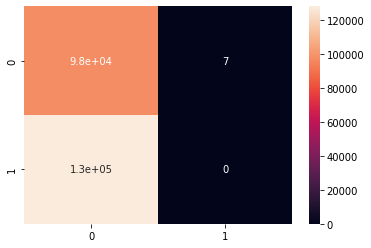

In [76]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [77]:
df=pd.read_csv("/content/drive/MyDrive/ECS 235 A/RevTrunc-20.csv")

In [78]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

In [79]:
df.drop([' Bwd PSH Flags'], axis=1, inplace=True)
df.drop([' Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop([' Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop([' Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop([' Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)


In [80]:
df.drop([' Timestamp'], axis=1, inplace=True)


In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df[' Label'] = labelencoder.fit_transform(df[' Label'])

In [82]:
ar=df.copy()
ar.drop([' Label'], axis=1, inplace=True)
X_test=ar

In [83]:
y_test=df.iloc[:,-1:]
y_test

,Label
0,0
1,0
2,0
3,0
4,0
...,...
225740,0
225741,0
225742,0
225743,0


In [87]:
X_test.drop(['Flow ID'], axis=1, inplace=True)

In [88]:
X_test.drop(X_test.columns[0], axis=1, inplace=True)

In [89]:
y_pred=clf.predict(X_test)

In [90]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      1.00      0.60     97718
           1       0.00      0.00      0.00    128027

    accuracy                           0.43    225745
   macro avg       0.22      0.50      0.30    225745
weighted avg       0.19      0.43      0.26    225745



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 97718      0]
 [128027      0]]


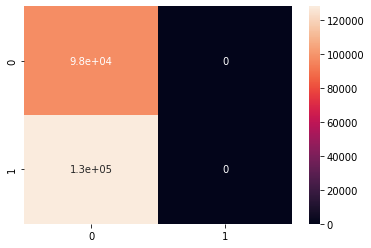

In [91]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)